# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [2]:
model = Word2Vec.load('Data/w2v.model')

In [3]:
model.wv.most_similar(['orange'], topn=3)

[('tangerine', 0.8847180008888245),
 ('lemon', 0.8360207080841064),
 ('satsuma', 0.7522045969963074)]

In [4]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split('\n')

In [5]:
items_for_sale[:3]

['salt', 'pepper', 'fresh']

In [6]:
words, vectors = [], []
for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f'Word {item} not found in vocab!')

In [7]:
sims = cosine_similarity(vectors, vectors)

In [8]:
sims.shape

(911, 911)

In [9]:
# for i in range(len(vectors)):
#     for j in range(len(vectors)):
#         if i <= j:
#             sims[i, j] = False

In [10]:
k = 15
indices = list(range(len(vectors)))

In [11]:
random.shuffle(indices)

In [12]:
indices = indices[:k]

In [13]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [14]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [15]:
for x in range(len(small_vectors)):
    small_sims[x, x] = 0

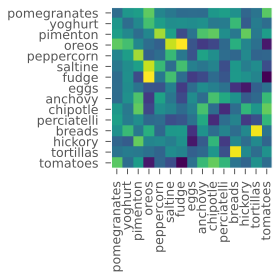

In [16]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [17]:
np.savetxt('Data/words.txt', words, fmt='%s')
np.save('Data/vectors.npy', vectors)